## 作業目標

1. 藉由固定的 dataset, 來驗證不同 loss function
2. Dataset 的特性跟我們選用的 loss function 對 accrancy 的影響

## 作業重點

請分別選用 MSE, binary _crossentropy, 並查看 train/test accurancy and loss rate

## 參考資料

[Usage of loss functions](https://keras.io/losses/)

[交叉熵（Cross-Entropy）](https://blog.csdn.net/rtygbwwwerr/article/details/50778098)

[TensorFlow 笔记 - 06 - 神经网络优化 - 损失函数, 自定义损失函数, 交叉熵](https://blog.csdn.net/qq_40147863/article/details/82015360)

[Tensorflow Day9 卷積神經網路 (CNN) 分析 (2) - Filter, ReLU, MaxPolling](https://ithelp.ithome.com.tw/articles/10187424)

## 資料準備

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
np.random.seed(10)
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
def normalize_mnist_data(x, y):
    x = x.astype('float32') / 255
    y = np_utils.to_categorical(y)
    return x, y

def normalize_result(x, y):
    print('x_image.shape:', x.shape)
    print('y_label.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(x_img_train, y_label_train)

Before normalization:
x_image.shape: (50000, 32, 32, 3)
y_label.shape: (50000, 1)


In [5]:
print('After normalization:')
x_img_train, y_label_train = normalize_mnist_data(x_img_train, y_label_train)
x_img_test, y_label_test = normalize_mnist_data(x_img_test, y_label_test)
normalize_result(x_img_train, y_label_train)

After normalization:
x_image.shape: (50000, 32, 32, 3)
y_label.shape: (50000, 10)


## 建立模型

In [6]:
# 宣告採用序列模型
model = Sequential()

# 卷積層1與池化層1
model.add(Conv2D(filters=32, kernel_size=(3, 3,), input_shape=(32, 32, 3,), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3,), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2,)))

# 平坦層
model.add(Flatten())
model.add(Dropout(rate=0.25))

# 全網路連接層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# 輸出層
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

## 載入之前訓練的模型

In [8]:
try:
    model.load_weights('data/part07/day_071_hw_cifar10_weights.h5')
    print('載入參數成功! 繼續訓練模型...')
except:
    print('載入參數失敗! 開始訓練一個新模型...')

載入參數失敗! 開始訓練一個新模型...


In [9]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 訓練模型

In [10]:
model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
train_history = model.fit(x=x_img_train, y=y_label_train, validation_split=0.25, epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 129s 3ms/step - loss: 0.0699 - acc: 0.4328 - val_loss: 0.0614 - val_acc: 0.5516
Epoch 2/12
37500/37500 [==============================] - 135s 4ms/step - loss: 0.0561 - acc: 0.5723 - val_loss: 0.0543 - val_acc: 0.6226
Epoch 3/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0496 - acc: 0.6294 - val_loss: 0.0510 - val_acc: 0.6528
Epoch 4/12
37500/37500 [==============================] - 138s 4ms/step - loss: 0.0454 - acc: 0.6654 - val_loss: 0.0478 - val_acc: 0.6535
Epoch 5/12
37500/37500 [==============================] - 137s 4ms/step - loss: 0.0415 - acc: 0.6964 - val_loss: 0.0449 - val_acc: 0.6811
Epoch 6/12
37500/37500 [==============================] - 139s 4ms/step - loss: 0.0384 - acc: 0.7245 - val_loss: 0.0420 - val_acc: 0.7002
Epoch 7/12
37500/37500 [==============================] - 137s 4ms/step - loss: 0.0350 - acc: 0.7502 - val_loss: 0.0403 - 

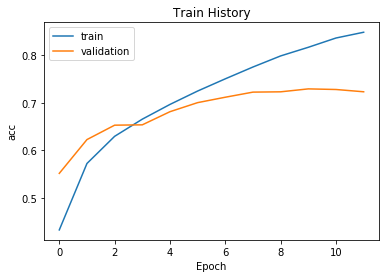

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

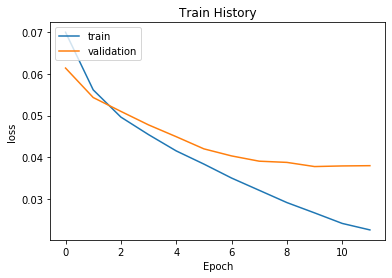

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

In [13]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
train_history = model.fit(x=x_img_train, y=y_label_train, validation_split=0.25, epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0765 - acc: 0.9743 - val_loss: 0.1272 - val_acc: 0.9511
Epoch 2/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0668 - acc: 0.9773 - val_loss: 0.1255 - val_acc: 0.9522
Epoch 3/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0605 - acc: 0.9790 - val_loss: 0.1238 - val_acc: 0.9530
Epoch 4/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0533 - acc: 0.9812 - val_loss: 0.1247 - val_acc: 0.9524
Epoch 5/12
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0480 - acc: 0.9829 - val_loss: 0.1254 - val_acc: 0.9526
Epoch 6/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0432 - acc: 0.9844 - val_loss: 0.1332 - val_acc: 0.9498
Epoch 7/12
37500/37500 [==============================] - 128s 3ms/step - loss: 0.0391 - acc: 0.9859 - val_loss: 0.1293 - 

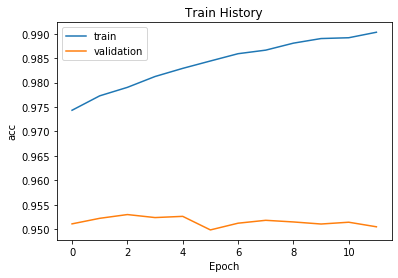

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

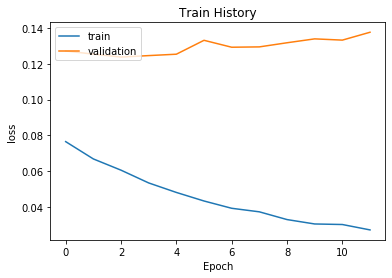

In [15]:
show_train_history(train_history, 'loss', 'val_loss')